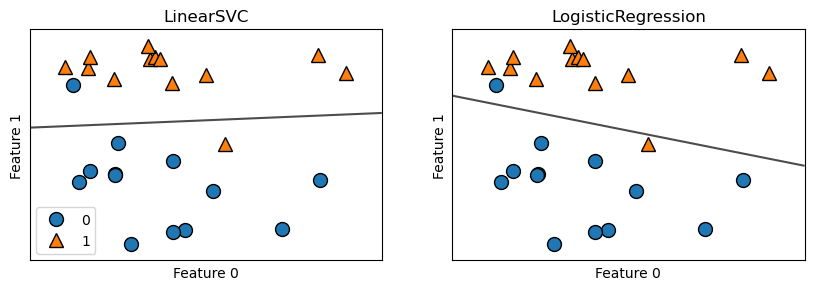

In [36]:
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn
X,y=mglearn.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

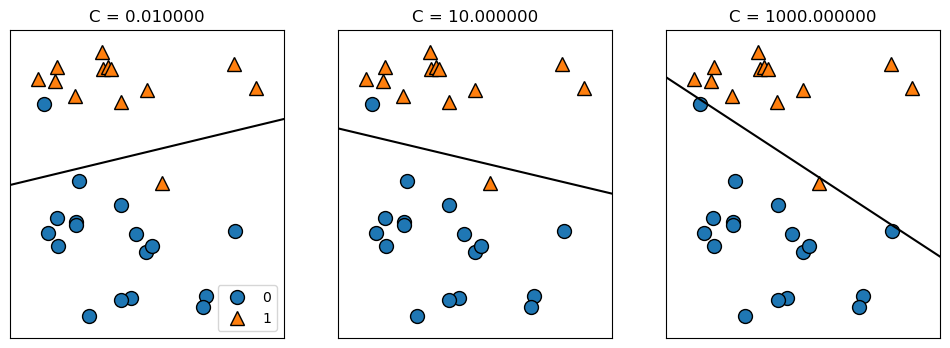

In [37]:
mglearn.plots.plot_linear_svc_regularization()

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(solver='liblinear').fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.953
Test set score:0.958


In [39]:
logreg100=LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.974
Test set score:0.965


In [40]:
logreg001=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.934
Test set score:0.930


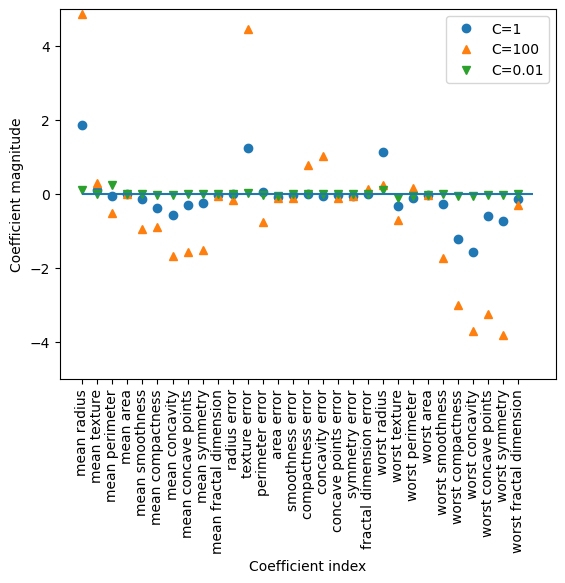

In [41]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001:0.92
Training accuracy of l1 logreg with C=1.000:0.96
Test accuracy of l1 logreg with C=1.000:0.96
Training accuracy of l1 logreg with C=100.000:0.99
Test accuracy of l1 logreg with C=100.000:0.98


D:\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


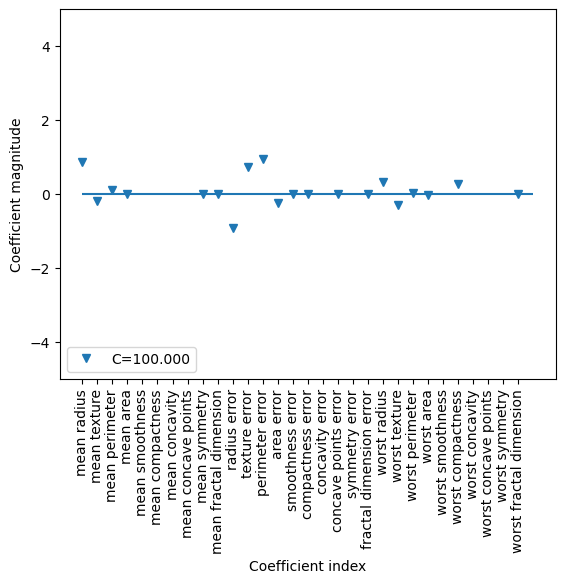

In [42]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1',solver='liblinear').fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}:{:.2f}".format(C,lr_l1.score(X_test,y_test)))
plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

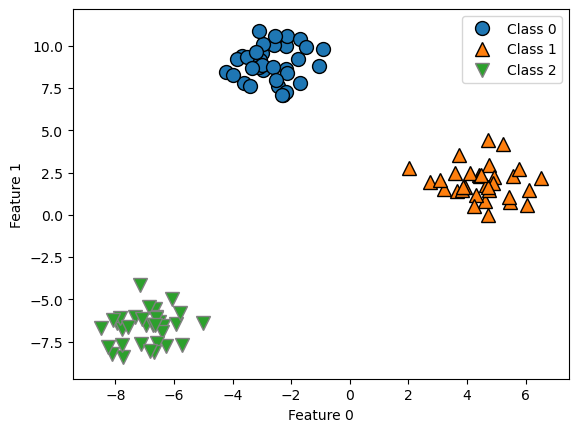

In [43]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [44]:
linear_svm=LinearSVC().fit(X,y)
print("Coefficient shape:",linear_svm.coef_.shape)
print("Intercept shape:",linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


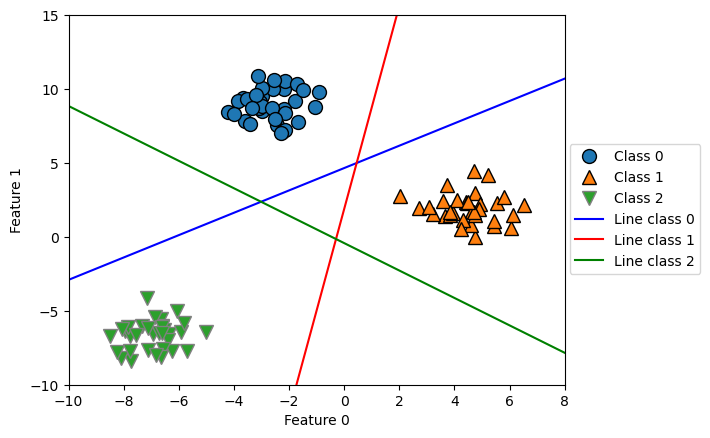

In [45]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

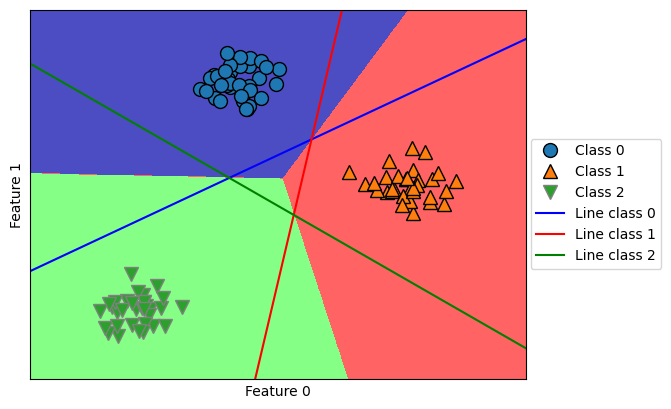

In [46]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")